In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#Drop useless data
df.drop('customerID',axis='columns',inplace=True)

In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Above TotalCharges are float & bleow MonthlyCharges are numbers

In [13]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

So we need to fix the float to number

In [14]:
# Converting the 'TotalCharges' column to numeric
#pd.to_numeric(df.TotalCharges)

We got error above that **Unable to parse string " "**
This is becuse emply place at that colum

**Below** The errors='coerce' part in pd.to_numeric(df.TotalCharges, errors='coerce') means that if there are any errors encountered during the conversion (like if a value can't be converted to a number), pandas will handle them by replacing those problematic values with a special marker, NaN, which stands for "Not a Number." This ensures that the conversion process doesn't stop completely due to errors in the data.

In [15]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

Above Some have False & Some have True,Where **True** mean Problematic cell

Now to view that Problematic cell we will pass it to data frame & it'll show that row

In [16]:
#Passing to a data frame
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

**Above (11, 20)** Show that we have total 11 rows at 20th colum place with this issue

In [18]:
df.shape

(7043, 20)

We have total 7043 rows so droping the 11 rows from that is not a big deal so lets do that

In [19]:
# include only where the "TotalCharges" column is not an empty string
df1=df[df.TotalCharges!=" "]
df1.shape

(7032, 20)

In [20]:
# After removing empty cells, again Converting the 'TotalCharges' column to numeric
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/var/folders/hy/b8mrcp_x1sxbt1d3f8hfqcmm0000gn/T/ipykernel_16456/1938495744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [21]:
# Checking the change
df1.TotalCharges.dtypes

dtype('float64')

In [22]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Creating the histogram plot for visualizing customer churn prediction based on tenure.

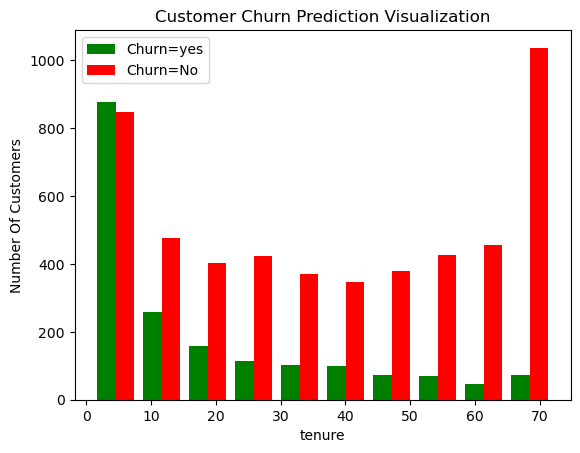

In [23]:
# Extracting 'tenure' data for customers who churned (Churn="Yes") and those who didn't (Churn="No")
tenure_churn_no = df1[df1.Churn=="No"].tenure  # Tenure data for customers who didn't churn
tenure_churn_yes = df1[df1.Churn=="Yes"].tenure  # Tenure data for customers who churned

# Setting labels and title for the plot
plt.xlabel("tenure")  # Label for the x-axis
plt.ylabel("Number Of Customers")  # Label for the y-axis
plt.title("Customer Churn Prediction Visualization")  # Title of the plot

# Creating a histogram to visualize the distribution of tenure for churned and non-churned customers
plt.hist([tenure_churn_yes, tenure_churn_no],  # Plotting histograms for churned and non-churned customers
         color=["green", "red"],  # Setting colors for each histogram
         label=["Churn=yes", "Churn=No"])  # Adding labels for each histogram to the legend

plt.legend()  # Displaying the legend on the plot


In [24]:
# Function to print unique values for each object-type column
def print_unique_col_values(df):
    for column in df:  # Iterating through columns in the DataFrame
        if df[column].dtype == "object":  # Checking if the data type of the column is 'object'
            print(f'{column}:{df[column].unique()}')  # Printing unique values for the object-type column

print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [25]:
# Replacing specific values in columns with 'No internet service' and 'No phone service'
df1.replace('No internet service', 'No', inplace=True)  # Replacing 'No internet service' with 'No'
df1.replace('No phone service', 'No', inplace=True)  # Replacing 'No phone service' with 'No'


/var/folders/hy/b8mrcp_x1sxbt1d3f8hfqcmm0000gn/T/ipykernel_16456/3112116400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)  # Replacing 'No internet service' with 'No'
/var/folders/hy/b8mrcp_x1sxbt1d3f8hfqcmm0000gn/T/ipykernel_16456/3112116400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)  # Replacing 'No phone service' with 'No'


In [26]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [27]:
# Converting binary categorical columns to numeric (1 for 'Yes' and 0 for 'No')
yes_no_columns = ["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity",
                  "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
                  "StreamingMovies", "PaperlessBilling", "Churn"]

for col in yes_no_columns:
    df1[col].replace({"Yes": 1, "No": 0}, inplace=True)  # Replacing 'Yes' with 1 and 'No' with 0 in specified columns


/var/folders/hy/b8mrcp_x1sxbt1d3f8hfqcmm0000gn/T/ipykernel_16456/567276120.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({"Yes": 1, "No": 0}, inplace=True)  # Replacing 'Yes' with 1 and 'No' with 0 in specified columns


In [28]:
# Checking the Change
for col in df1:
    print(f"{col}:{df1[col].unique()}")

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [29]:
# Converting 'gender' column to numeric (1 for 'Female' and 0 for 'Male')

df1["gender"].replace({"Female":1,"Male":0},inplace=True)

/var/folders/hy/b8mrcp_x1sxbt1d3f8hfqcmm0000gn/T/ipykernel_16456/1863032643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gender"].replace({"Female":1,"Male":0},inplace=True)


In [30]:
# One-hot encoding categorical columns
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=int)  # One-hot encoding

In [31]:
# Checking the Change
for col in df2:
    print(f"{col}:{df2[col].unique()}")

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
PaperlessBilling:[1 0]
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]
InternetService_DSL:[1 0]
InternetService_Fiber optic:[0 1]
InternetService_No:[0 1]
Contract_Month-to-month:[1 0]
Contract_One year:[0 1]
Contract_Two year:[0 1]
PaymentMethod_Bank transfer (automatic):[0 1]
PaymentMethod_Credit card (automatic):[0 1]
PaymentMethod_Electronic check:[1 0]
PaymentMethod_Mailed check:[0 1]


In [32]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [33]:
# Scaling numerical columns using MinMaxScaler
cols_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])  # Scaling specified numerical columns

In [34]:
# Checking the Change
for col in df2:
    print(f"{col}:{df2[col].unique()}")

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [35]:
# Splitting the data into features (x) and target variable (y)
x = df2.drop("Churn", axis="columns")  # Features (excluding 'Churn' column)
y = df2["Churn"]  # Target variable ('Churn' column)

In [36]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)  # Train-test split

In [37]:
len(x_train.columns)

26

**Build a model (ANN) in tensorflow/keras**

In [38]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

In [39]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [40]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

2024-05-15 03:31:31.396034: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-05-15 03:31:31.396071: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-05-15 03:31:31.396078: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-05-15 03:31:31.396521: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-15 03:31:31.396887: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2024-05-15 03:31:32.019799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


176/176 [==============================] - 2s 10ms/step - loss: 0.4475 - accuracy: 0.7831
Epoch 2/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4194 - accuracy: 0.7998
Epoch 3/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4166 - accuracy: 0.8034
Epoch 4/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4160 - accuracy: 0.8041
Epoch 5/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4171 - accuracy: 0.8027
Epoch 6/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4155 - accuracy: 0.8059
Epoch 7/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4150 - accuracy: 0.8044
Epoch 8/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4157 - accuracy: 0.8048
Epoch 9/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4157 - accuracy: 0.8043
Epoch 10/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4156 - accuracy: 0.8041


2024-05-15 03:34:08.116818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 1s 7ms/step - loss: 0.4467 - accuracy: 0.7889
[0.4466608166694641, 0.7889125943183899]
44/44 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       999
           1       0.64      0.61      0.63       408

    accuracy                           0.79      1407
   macro avg       0.74      0.74      0.74      1407
weighted avg       0.79      0.79      0.79      1407



2024-05-15 03:34:08.664292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


## Mitigating Skewdness of Data

### Method 1: Undersampling

In [49]:
# Counting the occurrences of each class in the 'Churn' column
count_class_0, count_class_1 = df.Churn.value_counts()  

df_class_0 = df2[df2["Churn"] == 0]  # Creating a DataFrame of class 0
df_class_1 = df2[df2["Churn"] == 1]  # Creating a DataFrame of class 1

In [50]:
df_class_0.shape

(5163, 27)

In [52]:
df_class_1.shape

(1869, 27)

**From above we can see that class o is biger then 1, so we'll do Undersampling of class 0**

In [59]:
# Undersampling class 0 to balance the classes

df_class_0_under=df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)

print(df_test_under.Churn.value_counts())

Churn
0    1869
1    1869
Name: count, dtype: int64


In [60]:
# Creating feature matrix 'x' for undersampled data
x = df_test_under.drop("Churn", axis="columns")
# Creating target vector 'y' for undersampled data
y = df_test_under["Churn"]
# Splitting the undersampled data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y) 

In [61]:
y_preds=ANN(x_train,y_train,x_test,y_test,"binary_crossentropy",-1)

Epoch 1/100


2024-05-15 04:11:30.540823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 3s 22ms/step - loss: 0.5994 - accuracy: 0.6773
Epoch 2/100
94/94 [==============================] - 1s 9ms/step - loss: 0.5027 - accuracy: 0.7589
Epoch 3/100
94/94 [==============================] - 1s 11ms/step - loss: 0.4889 - accuracy: 0.7672
Epoch 4/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4834 - accuracy: 0.7682
Epoch 5/100
94/94 [==============================] - 1s 10ms/step - loss: 0.4823 - accuracy: 0.7686
Epoch 6/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4807 - accuracy: 0.7729
Epoch 7/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4806 - accuracy: 0.7709
Epoch 8/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4807 - accuracy: 0.7732
Epoch 9/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4796 - accuracy: 0.7709
Epoch 10/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4784 - accuracy: 0.7736
Epoch 11/100
94/94

2024-05-15 04:12:57.104481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 1s 30ms/step - loss: 0.5478 - accuracy: 0.7219
[0.5478112697601318, 0.7219251394271851]
24/24 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.66      0.70       374
           1       0.70      0.78      0.74       374

    accuracy                           0.72       748
   macro avg       0.73      0.72      0.72       748
weighted avg       0.73      0.72      0.72       748



2024-05-15 04:12:58.012764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


### Method2: Oversampling

In [65]:
count_class_0,count_class_1

(5174, 1869)

In [74]:
# example of Oversampling
df_class_1.sample(2000,replace=True).shape

# Here we give "replace=True" so it automatically Duplicate...
#...the samples from the existing samples to make it 2000

(2000, 27)

In [80]:
# Implementing Oversampling
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

print(df_test_over.Churn.value_counts())

Churn
1    5174
0    5163
Name: count, dtype: int64


In [81]:
# Creating feature matrix 'x' for undersampled data
x = df_test_over.drop("Churn", axis="columns")
# Creating target vector 'y' for undersampled data
y = df_test_over["Churn"]
# Splitting the undersampled data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y) 

In [83]:
y_preds=ANN(x_train,y_train,x_test,y_test,"binary_crossentropy",-1)

Epoch 1/100


2024-05-15 04:36:55.054711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


259/259 [==============================] - 4s 13ms/step - loss: 0.5530 - accuracy: 0.7121
Epoch 2/100
259/259 [==============================] - 3s 10ms/step - loss: 0.4950 - accuracy: 0.7599
Epoch 3/100
259/259 [==============================] - 2s 10ms/step - loss: 0.4924 - accuracy: 0.7649
Epoch 4/100
259/259 [==============================] - 2s 9ms/step - loss: 0.4917 - accuracy: 0.7631
Epoch 5/100
259/259 [==============================] - 2s 8ms/step - loss: 0.4917 - accuracy: 0.7612
Epoch 6/100
259/259 [==============================] - 3s 10ms/step - loss: 0.4919 - accuracy: 0.7618
Epoch 7/100
259/259 [==============================] - 2s 9ms/step - loss: 0.4923 - accuracy: 0.7621
Epoch 8/100
259/259 [==============================] - 2s 9ms/step - loss: 0.4925 - accuracy: 0.7630
Epoch 9/100
259/259 [==============================] - 2s 9ms/step - loss: 0.4912 - accuracy: 0.7628
Epoch 10/100
259/259 [==============================] - 2s 9ms/step - loss: 0.4923 - accuracy: 0.76

2024-05-15 04:40:45.148493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - 1s 7ms/step - loss: 0.5313 - accuracy: 0.7476
[0.53132164478302, 0.747582197189331]
65/65 [==============================] - 0s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.64      0.72      1033
           1       0.70      0.85      0.77      1035

    accuracy                           0.75      2068
   macro avg       0.76      0.75      0.74      2068
weighted avg       0.76      0.75      0.74      2068



2024-05-15 04:40:45.802660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


**With oversampling: f1 score for minority class 1 improved to be 0.77 from 0.74**

### Method3: SMOTE

In [ ]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [ ]:
from im

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()